In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

import scipy

from datetime import datetime

In [9]:
import seaborn
seaborn.__version__

'0.10.1'

In [2]:
date=220210
n_init=1000
k = 12

in_file_name = '220127_LMM_Ti_2-3_reorder_col.txt'
in_ensembl_name = 'Gene_Ens_v102_canfam3.txt'
out_k_cluster_name = f'{date}_LMM_Ti_2-3_k_cl{k}'

In [3]:
pd_in = pd.read_csv(in_file_name, sep='\t', index_col=0)
pd_ens = pd.read_csv(in_ensembl_name, sep='\t', index_col=0)

### Normalization

In [4]:
np_in_z = stats.zscore(pd_in, axis=1, nan_policy='omit')
pd_in_z = pd.DataFrame(np_in_z, index=pd_in.index, columns=pd_in.columns)

### K-mean clustering

In [5]:
start = datetime.now()

km = KMeans(n_clusters=k, n_init=n_init, random_state=0)
km.fit(pd_in_z)

end = datetime.now()
print(f'Time: {end - start}')

Time: 0:00:25.488791


### Heatmap of k-means

In [6]:
pd_in_z.index = km.labels_

In [7]:
km.labels_

array([ 0, 11,  8, ...,  0,  9,  7])

# of gene in each cluster
cl 0 = 176
cl 1 = 238
cl 2 = 113
cl 3 = 203
cl 4 = 232
cl 5 = 218
cl 6 = 191
cl 7 = 120
cl 8 = 255
cl 9 = 219
cl 10 = 149
cl 11 = 138


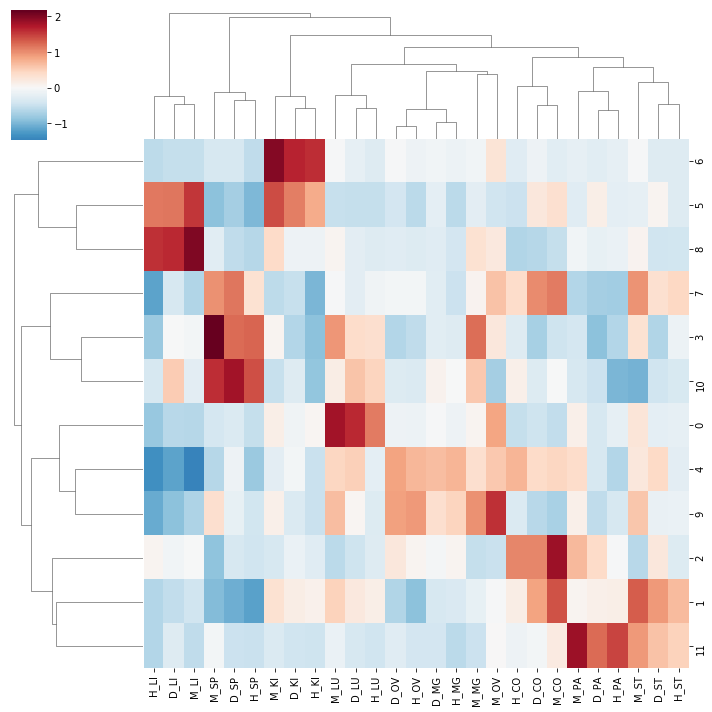

In [8]:
# Heatmap using average values
pd_in_z_mg = pd.DataFrame(index=pd_in_z.columns)

print('# of gene in each cluster')
for i in range(k):
    pd_in_z_mg[i] = pd_in_z.loc[i].mean(axis=0)
    print(f'cl {i} = {len(pd_in_z.loc[i])}')

# clustering heatmap
g=sns.clustermap(pd_in_z_mg.T, cmap='RdBu_r', center=0)
plt.savefig(f'{out_k_cluster_name}_HM_k.pdf')

# of gene in each cluster
cl 0 = 176
cl 1 = 238
cl 2 = 113
cl 3 = 203
cl 4 = 232
cl 5 = 218
cl 6 = 191
cl 7 = 120
cl 8 = 255
cl 9 = 219
cl 10 = 149
cl 11 = 138


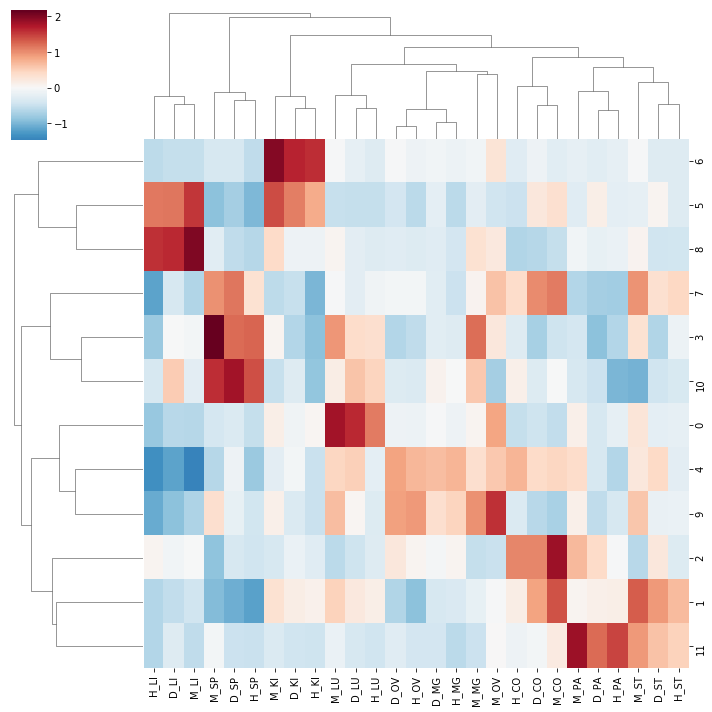

In [9]:
# Heatmap using average values
pd_in_z_mg = pd.DataFrame(index=pd_in_z.columns)

print('# of gene in each cluster')
for i in range(k):
    pd_in_z_mg[i] = pd_in_z.loc[i].mean(axis=0)
    print(f'cl {i} = {len(pd_in_z.loc[i])}')

# clustering heatmap
g=sns.clustermap(pd_in_z_mg.T, cmap='RdBu_r', center=0)

In [10]:
# Extract clustering info
xaxis = g.dendrogram_col.dendrogram['leaves']
yaxis = g.dendrogram_row.dendrogram['leaves']`

In [13]:
xaxis_edit = [7, 6, 8, 23, 21, 22, 5, 3, 4, 11, 9, 10, 15, 16, 17, 12, 13, 14, 1, 0, 2, 20, 18, 19, 26, 24, 25]

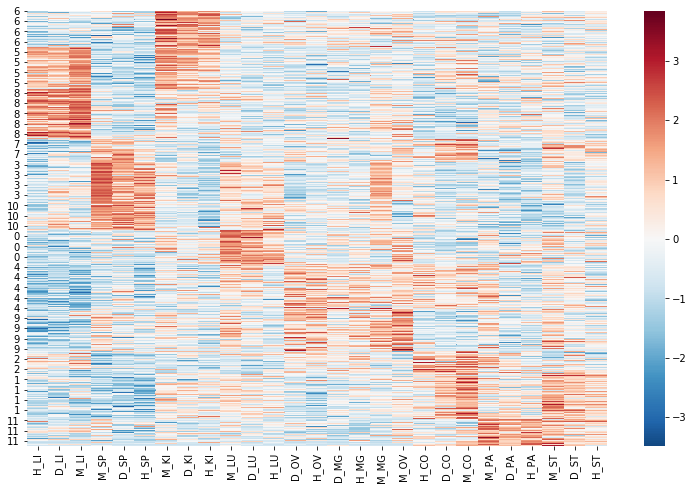

In [11]:
# Heatmap using each values
plt.figure(figsize=(13,8))
sns.heatmap(pd_in_z.loc[yaxis].iloc[:, xaxis], cmap='RdBu_r', center=0)
plt.savefig(f'{out_k_cluster_name}_HM_raw.pdf')

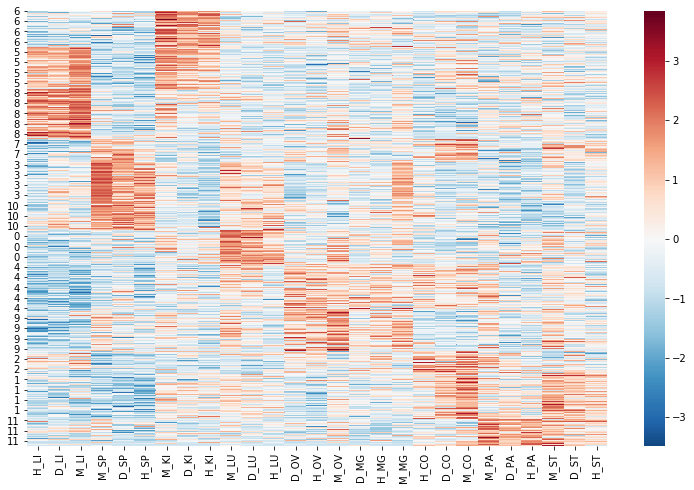

In [14]:
# Heatmap using each values
plt.figure(figsize=(13,8))
sns.heatmap(pd_in_z.loc[yaxis].iloc[:, xaxis_edit], cmap='RdBu_r', center=0)
plt.savefig(f'{out_k_cluster_name}_HM_raw_xaxis_edit.pdf')

### Extract gene-cluster info

In [11]:
pd_k_out = pd.DataFrame(km.labels_, index=pd_in.index, columns=['k_cluster'])

In [12]:
pd_k_out = pd.concat([pd_k_out, pd_ens], axis=1, join='inner')

In [13]:
pd_k_out.to_csv(f'{out_k_cluster_name}.txt', sep='\t', index=True, index_label='GeneID', header=True)